In [2]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [5]:
import re
import json
from collections import Counter

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from tqdm import tqdm_notebook

In [7]:
%matplotlib inline

In [8]:
from matplotlib import cm
from matplotlib import pyplot as plt

In [9]:
tweets_df = pd.read_csv('2020-04-30 Coronavirus Tweets.CSV')
tweets_df1 = pd.read_csv('2020-04-29 Coronavirus Tweets.CSV')
tweets_df2 = pd.read_csv('2020-04-28 Coronavirus Tweets.CSV')
tweets_df3 = pd.read_csv('2020-04-27 Coronavirus Tweets.CSV')
tweets_df4 = pd.read_csv('2020-04-26 Coronavirus Tweets.CSV')
tweets_df5 = pd.read_csv('2020-04-25 Coronavirus Tweets.CSV')
tweets_df6 = pd.read_csv('2020-04-24 Coronavirus Tweets.CSV')



In [10]:
tweets_df= tweets_df.append(tweets_df1,ignore_index=True)

In [11]:
tweets_df= tweets_df.append(tweets_df2,ignore_index=True)

In [12]:
tweets_df= tweets_df.append(tweets_df3,ignore_index=True)

In [13]:
tweets_df= tweets_df.append(tweets_df4,ignore_index=True)

In [14]:
tweets_df= tweets_df.append(tweets_df5,ignore_index=True)

In [15]:
tweets_df= tweets_df.append(tweets_df6,ignore_index=True)

In [16]:
tweets_df.shape

(2560232, 22)

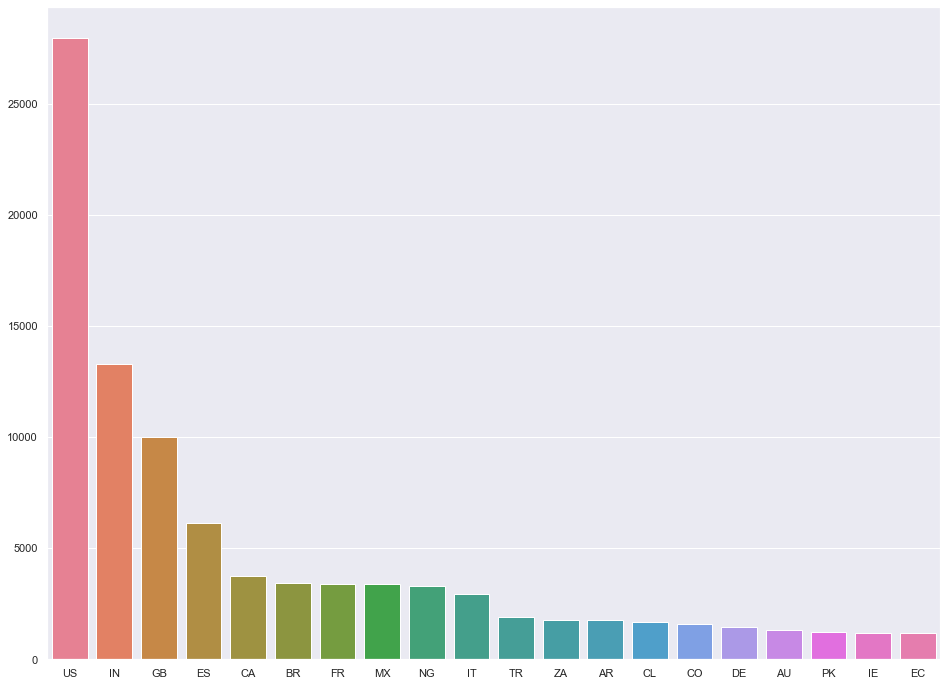

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
# count the occurrence of each class 
data = tweets_df["country_code"].value_counts() 
# get x and y data 
points = data.index[:20]
frequency = data.values[:20]
#plot graph
fig, ax = plt.subplots(figsize = (16, 12))
ax = sns.barplot(x=points,y=frequency,palette="husl")
plt.savefig('country_count.png',bbox_inches='tight')

In [19]:
frequency = data.values[:20]
print(frequency)

[27979 13300 10020  6125  3755  3441  3406  3378  3304  2949  1905  1787
  1772  1667  1609  1458  1306  1207  1204  1170]


In [20]:
tweets_df = tweets_df[['status_id','screen_name','user_id','text','country_code','lang','place_full_name']]

In [21]:
tweets_df

,status_id,screen_name,user_id,text,country_code,lang,place_full_name
0,1255648057644867584,IMSS_SanLuis,860252856829587457,"Asegura sus beneficios, registra a tu esposa e...",NaN,es,NaN
1,1255648058483724288,_ElFaro_,42705538,"#COVID19 | El Faro conversó con policías, un f...",NaN,es,NaN
2,1255648056764071940,Cambio16,154836286,"Si ya era cuestionable la burocracia, lo es má...",NaN,es,NaN
3,1255648056717897728,GobCDMX,36100710,Las medidas de higiene ayudan a reducir la pro...,NaN,es,NaN
4,1255648058295169025,IMSSZac,849376242637864960,Cubre tu nariz y boca al estornudar con el áng...,NaN,es,NaN
...,...,...,...,...,...,...,...
2560227,1253836110649843712,Perfil1019,1131654508474458112,#AHORA 🔵 | Se actualizan los datos de #Coronav...,NaN,es,NaN
2560228,1253836110377058305,INTELNESIA,1151150801496104960,"#coronavirus update, Middle East:\n\n🇹🇷 Turkey...",NaN,en,NaN
2560229,1253836108959539201,PhilBo35,61836624,How can you not love David Dobrik Cars / 10g’s...,NaN,en,NaN
2560230,1253836113736798209,Axel_Troncoso,99160819,Ministerio de Justicia confirma traslado de in...,CL,es,"Las Condes, Chile"


In [22]:
tweets_df = tweets_df.loc[ (tweets_df['lang'] == 'en'),:]

In [23]:
tweets_df

,status_id,screen_name,user_id,text,country_code,lang,place_full_name
5,1255648059154812928,SeattleHSD,124262490,Attention Seattle shoppers! Grocery stores are...,NaN,en,NaN
8,1255648057296748546,ANCALERTS,44728980,"Microsoft sees digital reboot from pandemic, p...",NaN,en,NaN
10,1255648057670041600,RadioNLNews,171548670,"Despite #COVID19 impacts, the Victoria Street ...",NaN,en,NaN
22,1255648057846366209,WBZNightside,46218350,Right Now on NightSide - China Expert BU Prof....,NaN,en,NaN
25,1255648057917661187,TheTyee,14269008,If there’s an ideal person to provide insight ...,NaN,en,NaN
...,...,...,...,...,...,...,...
2560224,1253836105532743680,RockinRobin2012,544713449,Hi @EUHomeAffairs @Place_Beauvau @BMI_Bund @fo...,NaN,en,NaN
2560225,1253836110926540800,LegacyofSol,1147568327964815360,"I am not asking for a handout, but if somethin...",NaN,en,NaN
2560228,1253836110377058305,INTELNESIA,1151150801496104960,"#coronavirus update, Middle East:\n\n🇹🇷 Turkey...",NaN,en,NaN
2560229,1253836108959539201,PhilBo35,61836624,How can you not love David Dobrik Cars / 10g’s...,NaN,en,NaN


In [24]:
tweets_df['text']

5          Attention Seattle shoppers! Grocery stores are...
8          Microsoft sees digital reboot from pandemic, p...
10         Despite #COVID19 impacts, the Victoria Street ...
22         Right Now on NightSide - China Expert BU Prof....
25         If there’s an ideal person to provide insight ...
                                 ...                        
2560224    Hi @EUHomeAffairs @Place_Beauvau @BMI_Bund @fo...
2560225    I am not asking for a handout, but if somethin...
2560228    #coronavirus update, Middle East:\n\n🇹🇷 Turkey...
2560229    How can you not love David Dobrik Cars / 10g’s...
2560231    @AlexanderKaty @MeatballMom2 Actually, watch i...
Name: text, Length: 1406774, dtype: object

In [25]:
#Retaining only alphabets (removing all punctuations and numbers)
tweets_df["text"] = [re.sub('[^a-zA-Z]', ' ',i) for i in tweets_df["text"]]

#Converting into lower case 
tweets_df["text"] = [i.lower() for i in tweets_df["text"]]

#Removing Emoticons
def deEmoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweets_df["text"]  = [deEmoji(i) for i in tweets_df["text"] ]


#Removing URLs
#tweets_df['text'] = tweets_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))

#Removing Stop Words
cachedStopWords = set(stopwords.words("english"))
tweets_df["text"] = tweets_df["text"].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in cachedStopWords]))



In [26]:
tweets_df.head()

,status_id,screen_name,user_id,text,country_code,lang,place_full_name
5,1255648059154812928,SeattleHSD,124262490,attention seattle shoppers grocery stores work...,NaN,en,NaN
8,1255648057296748546,ANCALERTS,44728980,microsoft sees digital reboot pandemic profits...,NaN,en,NaN
10,1255648057670041600,RadioNLNews,171548670,despite covid impacts victoria street west pro...,NaN,en,NaN
22,1255648057846366209,WBZNightside,46218350,right nightside china expert bu prof gregoryst...,NaN,en,NaN
25,1255648057917661187,TheTyee,14269008,ideal person provide insight effects covid hum...,NaN,en,NaN


In [27]:
tweets_df["text"]

5          attention seattle shoppers grocery stores work...
8          microsoft sees digital reboot pandemic profits...
10         despite covid impacts victoria street west pro...
22         right nightside china expert bu prof gregoryst...
25         ideal person provide insight effects covid hum...
                                 ...                        
2560224    hi euhomeaffairs place beauvau bmi bund foreig...
2560225    asking handout something speaks every little b...
2560228    coronavirus update middle east turkey new case...
2560229    love david dobrik cars g xbox ps coronavirus d...
2560231    alexanderkaty meatballmom actually watch speci...
Name: text, Length: 1406774, dtype: object

In [28]:
word_list = [word for line in tweets_df["text"] for word in line.split()]
word_list[:10]
rem = ['https','co','amp']
word_list_n = [word for word in word_list if word not in rem]

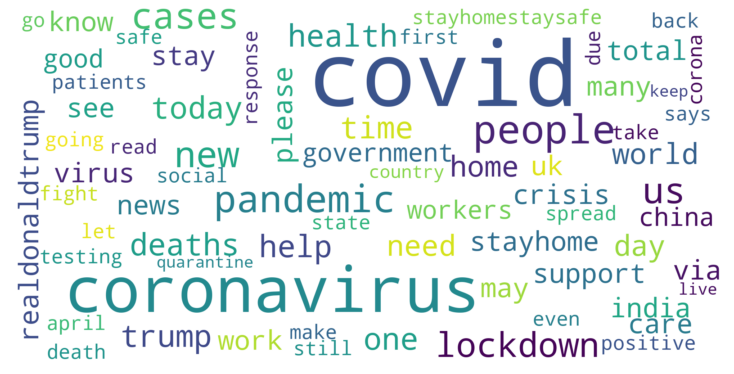

In [69]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color='white',
    max_words=70,
    max_font_size=50, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_n))
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
#plt.title("WordCloud of Corona-Tweets")
plt.tight_layout(pad = 0) 

plt.savefig('wordcloud_world.png',bbox_inches='tight')
plt.show()

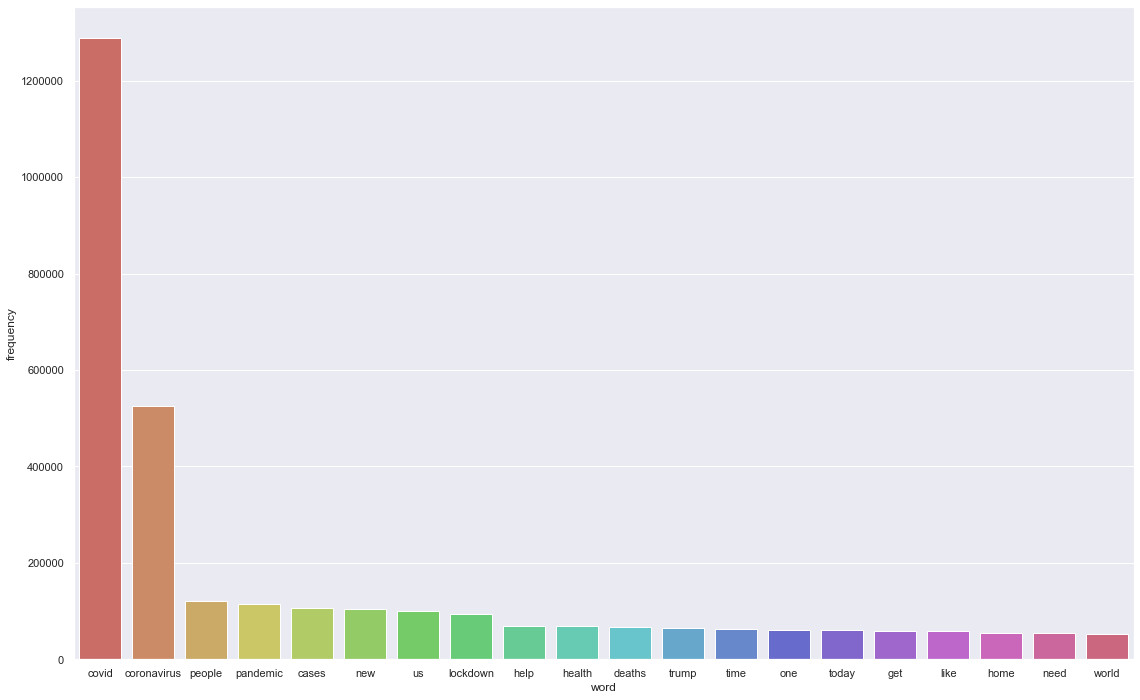

In [30]:
sns.set(style="darkgrid")
counts = Counter(word_list_n).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (19, 12))
ax = sns.barplot(y="frequency", x='word', ax = ax, data=counts_df,palette="hls")
plt.savefig('wordcount_bar_world.png',bbox_inches='tight')

In [31]:
counts_df

,word,frequency
0,covid,1288847
1,coronavirus,524658
2,people,121589
3,pandemic,114998
4,cases,106405
5,new,104156
6,us,100015
7,lockdown,93610
8,help,69020
9,health,68696


In [32]:
tweets_df_india = tweets_df.loc[ (tweets_df['country_code'] == 'IN'),:]
tweets_df_india.head()

,status_id,screen_name,user_id,text,country_code,lang,place_full_name
558,1255648466832896006,KHPT_BLR,714518678063034368,coronavirus pandemic continues affect communit...,IN,en,"Karnataka, India"
931,1255648917116448768,TahaAnsari03,1158919601821847552,plasmatherapy works informative video close fr...,IN,en,Mumbai
1939,1255650251827904513,DkSufiyan,3147099229,help plzz show humanity policerajasthan mpdial...,IN,en,"Mumbai, India"
2146,1255650549527011330,DkSufiyan,3147099229,help plzz show humanity policerajasthan mpdial...,IN,en,"Mumbai, India"
3101,1255651759361421313,iiirdi,87385342,discipline weighs ounce regret weighs ton stay...,IN,en,"Hyderabad, India"


In [33]:
word_list_in = [word for line in tweets_df_india["text"] for word in line.split()]
rem2 = ['https','co','amp']
word_list_in_n = [word for word in word_list_in if word not in rem]

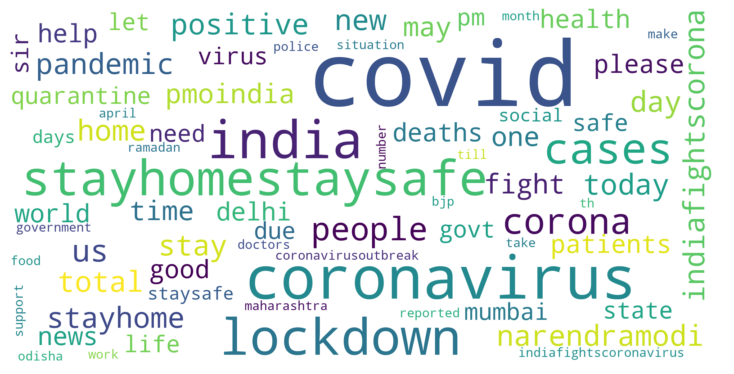

In [70]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color='white',
    max_words=70,
    max_font_size=50, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_in_n))
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
#plt.title("WordCloud of Corona-Tweets")
plt.tight_layout(pad = 0) 

plt.savefig('wordcloud_india.png',bbox_inches='tight')
plt.show()

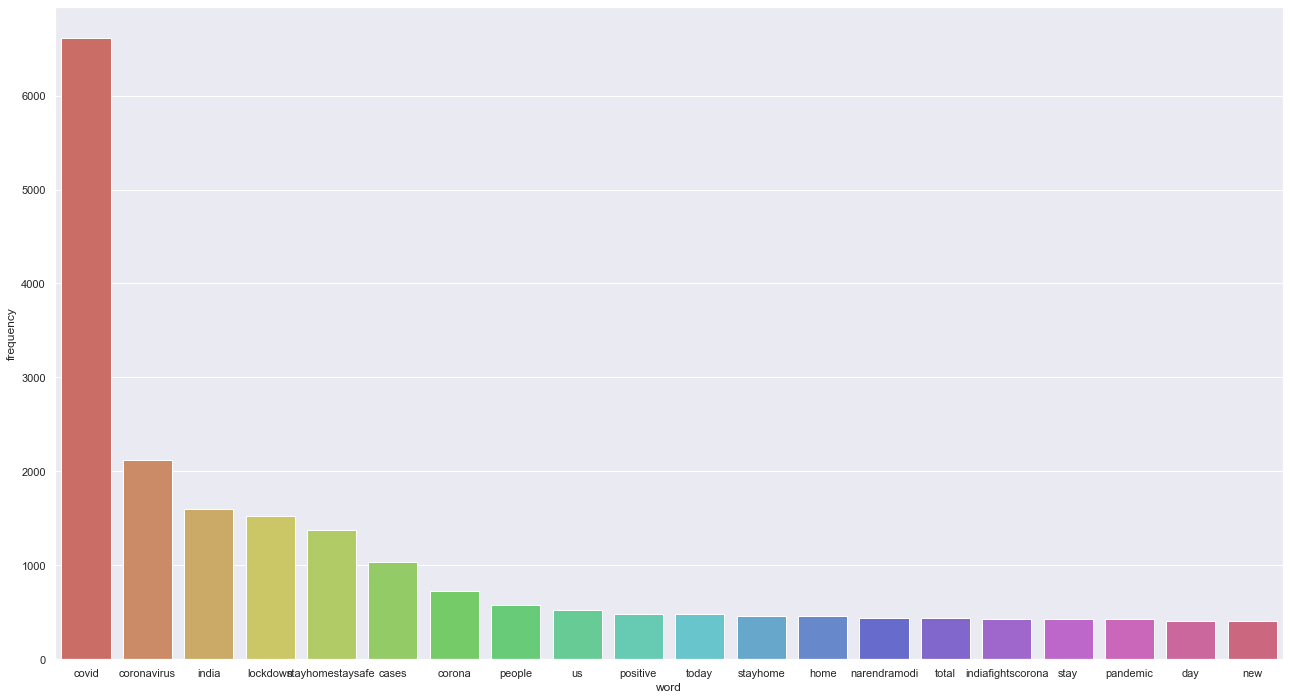

In [35]:
sns.set(style="darkgrid")
counts = Counter(word_list_in_n).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (22, 12))
ax = sns.barplot(y="frequency", x='word', ax = ax, data=counts_df,palette="hls")
plt.savefig('wordcount_bar_india.png',bbox_inches='tight')

In [36]:
counts_df

,word,frequency
0,covid,6613
1,coronavirus,2117
2,india,1603
3,lockdown,1530
4,stayhomestaysafe,1377
5,cases,1030
6,corona,722
7,people,577
8,us,520
9,positive,487


In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
vectorizer = CountVectorizer(max_features = 20)
cv = vectorizer.fit_transform(word_list_n).toarray()

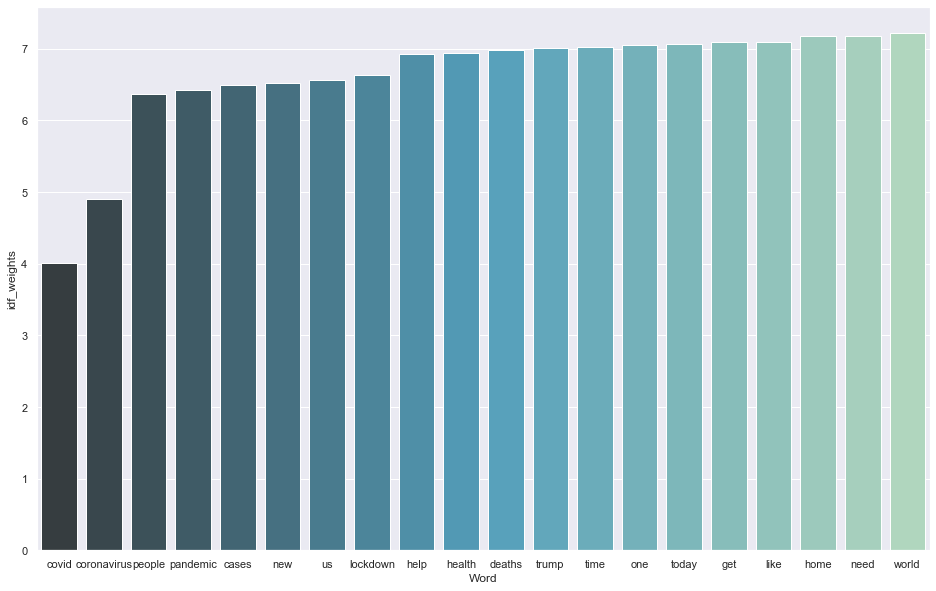

In [39]:
#Using Term Frequency (TF-IDF)
tf=TfidfTransformer(smooth_idf=True,use_idf=True)
tf.fit(cv)

# print idf values
data = { "Word" :vectorizer.get_feature_names(), "idf_weights":tf.idf_}
df_idf = pd.DataFrame(data)
 
# sort ascending
df_idf = df_idf.sort_values(by=['idf_weights'])


sns.set(style="darkgrid")
# get x and y data 
points = df_idf["Word"]
frequency = df_idf["idf_weights"]
#plot graph
fig, ax = plt.subplots(figsize = (16, 10))
ax = sns.barplot(x=points,y=frequency,palette="GnBu_d")
plt.savefig('tfdif.png')


Sentiment Ananlysis


In [44]:
df_idf

,Word,idf_weights
2,covid,4.005028
1,coronavirus,4.903784
14,people,6.365877
13,pandemic,6.421609
0,cases,6.499270
11,new,6.520633
18,us,6.561202
9,lockdown,6.627384
6,help,6.932121
5,health,6.936827


In [45]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = tweets_df["text"].apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))
sent_scores_df.shape

(1406774, 4)

In [46]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head()

,neg,neu,pos,compound,val
0,0.034,0.686,0.279,0.8750,positive
1,0.000,0.775,0.225,0.4404,positive
2,0.000,1.000,0.000,0.0000,neutral
3,0.104,0.896,0.000,-0.2960,negative
4,0.000,0.805,0.195,0.5267,positive


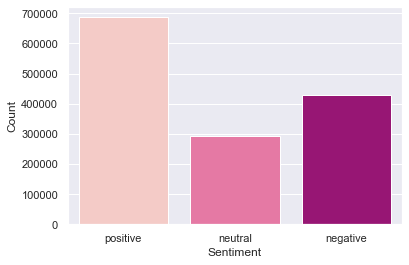

In [47]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['Sentiment', 'Count']

sns.barplot(y="Count", x='Sentiment', data=sent_counts,palette="RdPu")
plt.savefig('sentiment.png')

In [48]:
sent_counts

,Sentiment,Count
0,positive,687220
1,neutral,291983
2,negative,427571


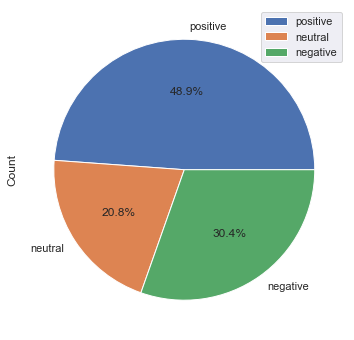

In [49]:
sent_counts.plot.pie(y='Count', figsize=(6,6),labels=sent_counts['Sentiment'], autopct='%1.1f%%')
plt.savefig('pie_world.png')

# INDIA


In [50]:
sid_I = SentimentIntensityAnalyzer()
sentiment_scores_I = tweets_df_india["text"].apply(lambda x: sid_I.polarity_scores(x))
sent_scores_df_in = pd.DataFrame(list(sentiment_scores_I))
sent_scores_df_in.head(7)

,neg,neu,pos,compound
0,0.000,0.885,0.115,0.3818
1,0.000,0.814,0.186,0.4939
2,0.000,0.816,0.184,0.4019
3,0.000,0.828,0.172,0.4019
4,0.286,0.714,0.000,-0.4215
5,0.000,1.000,0.000,0.0000
6,0.000,0.876,0.124,0.4767


In [51]:
sent_scores_df_in['val'] = sent_scores_df_in['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df_in.head()

,neg,neu,pos,compound,val
0,0.000,0.885,0.115,0.3818,positive
1,0.000,0.814,0.186,0.4939,positive
2,0.000,0.816,0.184,0.4019,positive
3,0.000,0.828,0.172,0.4019,positive
4,0.286,0.714,0.000,-0.4215,negative


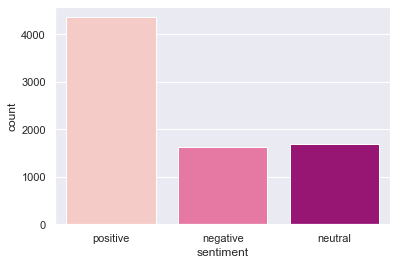

In [52]:
sent_counts_in = pd.DataFrame.from_dict(Counter(sent_scores_df_in['val']), orient = 'index').reset_index()
sent_counts_in.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts_in,palette="RdPu")
plt.savefig('sentiment_india.png')

In [53]:
sent_counts_in

,sentiment,count
0,positive,4357
1,negative,1634
2,neutral,1681


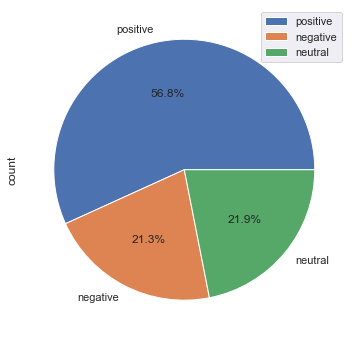

In [54]:
sent_counts_in.plot.pie(y='count', figsize=(6,6),labels=sent_counts_in['sentiment'], autopct='%1.1f%%')
#plt.show()

plt.savefig('pie_india.png')

# MEXICO

In [55]:
tweets_df_mex = tweets_df.loc[ (tweets_df['country_code'] == 'MX'),:]
tweets_df_mex.head()

,status_id,screen_name,user_id,text,country_code,lang,place_full_name
32913,1255697218364899334,Jeff_Oster,16228520,remember san pancho winter spring quiet pueblo...,MX,en,"Bahía de Banderas, Nayarit"
51544,1255729124657836032,anchor_urvashi,2854072224,herd immunity world talking herd immunity real...,MX,en,"Azcapotzalco, Distrito Federal"
93268,1255780145308237824,marquesjorgemd,1228025808771600384,aplusk mr kutcher pls helpme experience wisdom...,MX,en,"Tlaquepaque, Jalisco"
95638,1255782641485438977,Amalia_Escobar,229710488,eah son de sonora xico quedateencasa covid htt...,MX,en,"Hermosillo, Sonora"
121189,1255807136413765632,versuserwin,67248879,sdgs challenge improve lives covid crisis http...,MX,en,"Pachuca de Soto, Hidalgo"


In [56]:
word_list_mex = [word for line in tweets_df_mex["text"] for word in line.split()]
rem2 = ['https','co','amp']
word_list_in_mex = [word for word in word_list_mex if word not in rem]

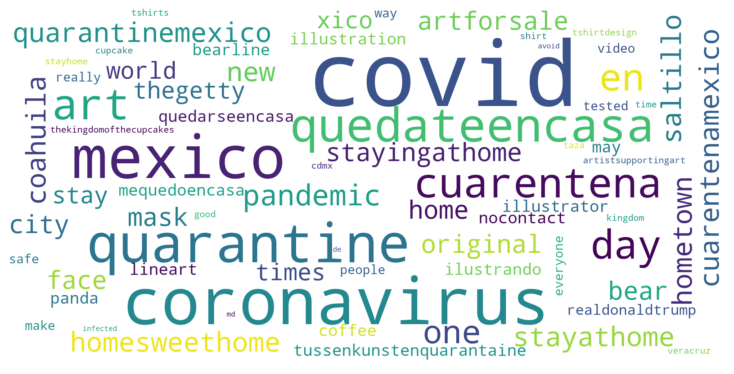

In [71]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    background_color='white',
    max_words=70,
    max_font_size=50, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list_in_mex))
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
#plt.title("WordCloud of Corona-Tweets")
plt.tight_layout(pad = 0) 

plt.savefig('wordcloud_mexico.png',bbox_inches='tight')
plt.show()

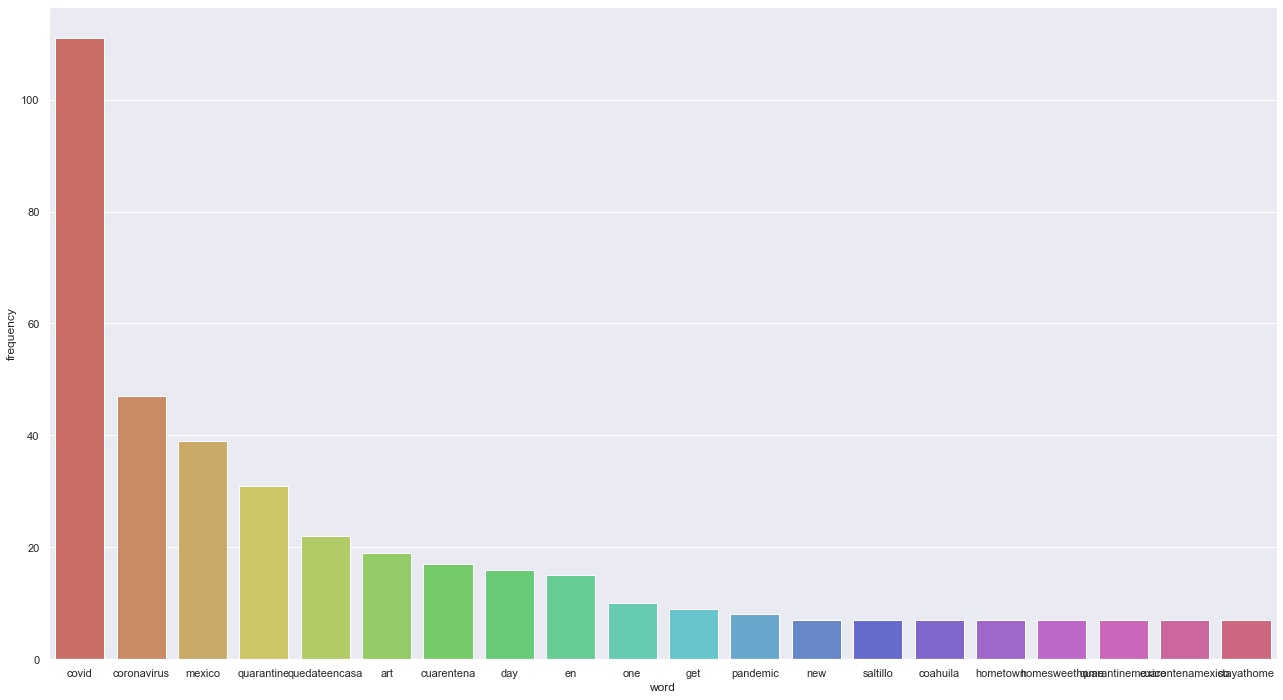

In [58]:
sns.set(style="darkgrid")
counts = Counter(word_list_in_mex).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (22, 12))
ax = sns.barplot(y="frequency", x='word', ax = ax, data=counts_df,palette="hls")
plt.savefig('wordcount_bar_mex.png',bbox_inches='tight')

In [59]:
counts_df

,word,frequency
0,covid,111
1,coronavirus,47
2,mexico,39
3,quarantine,31
4,quedateencasa,22
5,art,19
6,cuarentena,17
7,day,16
8,en,15
9,one,10


In [60]:
sid_m = SentimentIntensityAnalyzer()
sentiment_scores_m = tweets_df_mex["text"].apply(lambda x: sid_m.polarity_scores(x))
sent_scores_df_m = pd.DataFrame(list(sentiment_scores_m))
sent_scores_df_m.head(7)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.125,0.737,0.138,0.0810
2,0.174,0.675,0.151,-0.1779
3,0.000,1.000,0.000,0.0000
4,0.268,0.458,0.275,-0.2263
5,0.046,0.669,0.286,0.8360
6,0.000,0.820,0.180,0.2960


In [61]:
sent_scores_df_m['val'] = sent_scores_df_m['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df_m.head()

,neg,neu,pos,compound,val
0,0.000,1.000,0.000,0.0000,neutral
1,0.125,0.737,0.138,0.0810,positive
2,0.174,0.675,0.151,-0.1779,negative
3,0.000,1.000,0.000,0.0000,neutral
4,0.268,0.458,0.275,-0.2263,negative


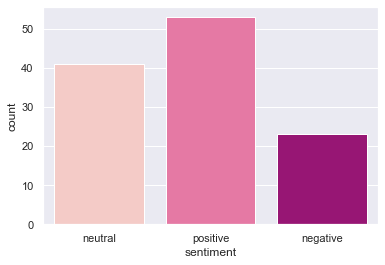

In [62]:
sent_counts_mex = pd.DataFrame.from_dict(Counter(sent_scores_df_m['val']), orient = 'index').reset_index()
sent_counts_mex.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts_mex,palette="RdPu")
plt.savefig('sentiment_mexico.png')

In [63]:
sent_counts_mex

,sentiment,count
0,neutral,41
1,positive,53
2,negative,23


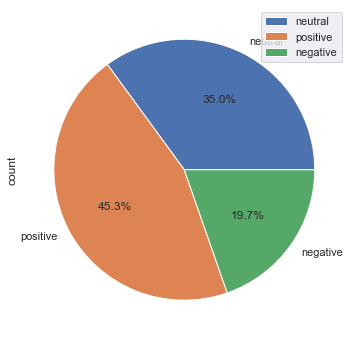

In [64]:
sent_counts_mex.plot.pie(y='count', figsize=(6,6),labels=sent_counts_mex['sentiment'], autopct='%1.1f%%')
#plt.show()

plt.savefig('pie_mexico.png')